## Face Detection

In this tutorial we will see how we can detect human faces from the images.

#### 1. Import required libraries

In [2]:
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import os
from IPython.display import Image

print('OpenCV - {}'.format(cv.__version__))

OpenCV - 4.0.0


#### 2. Read an image

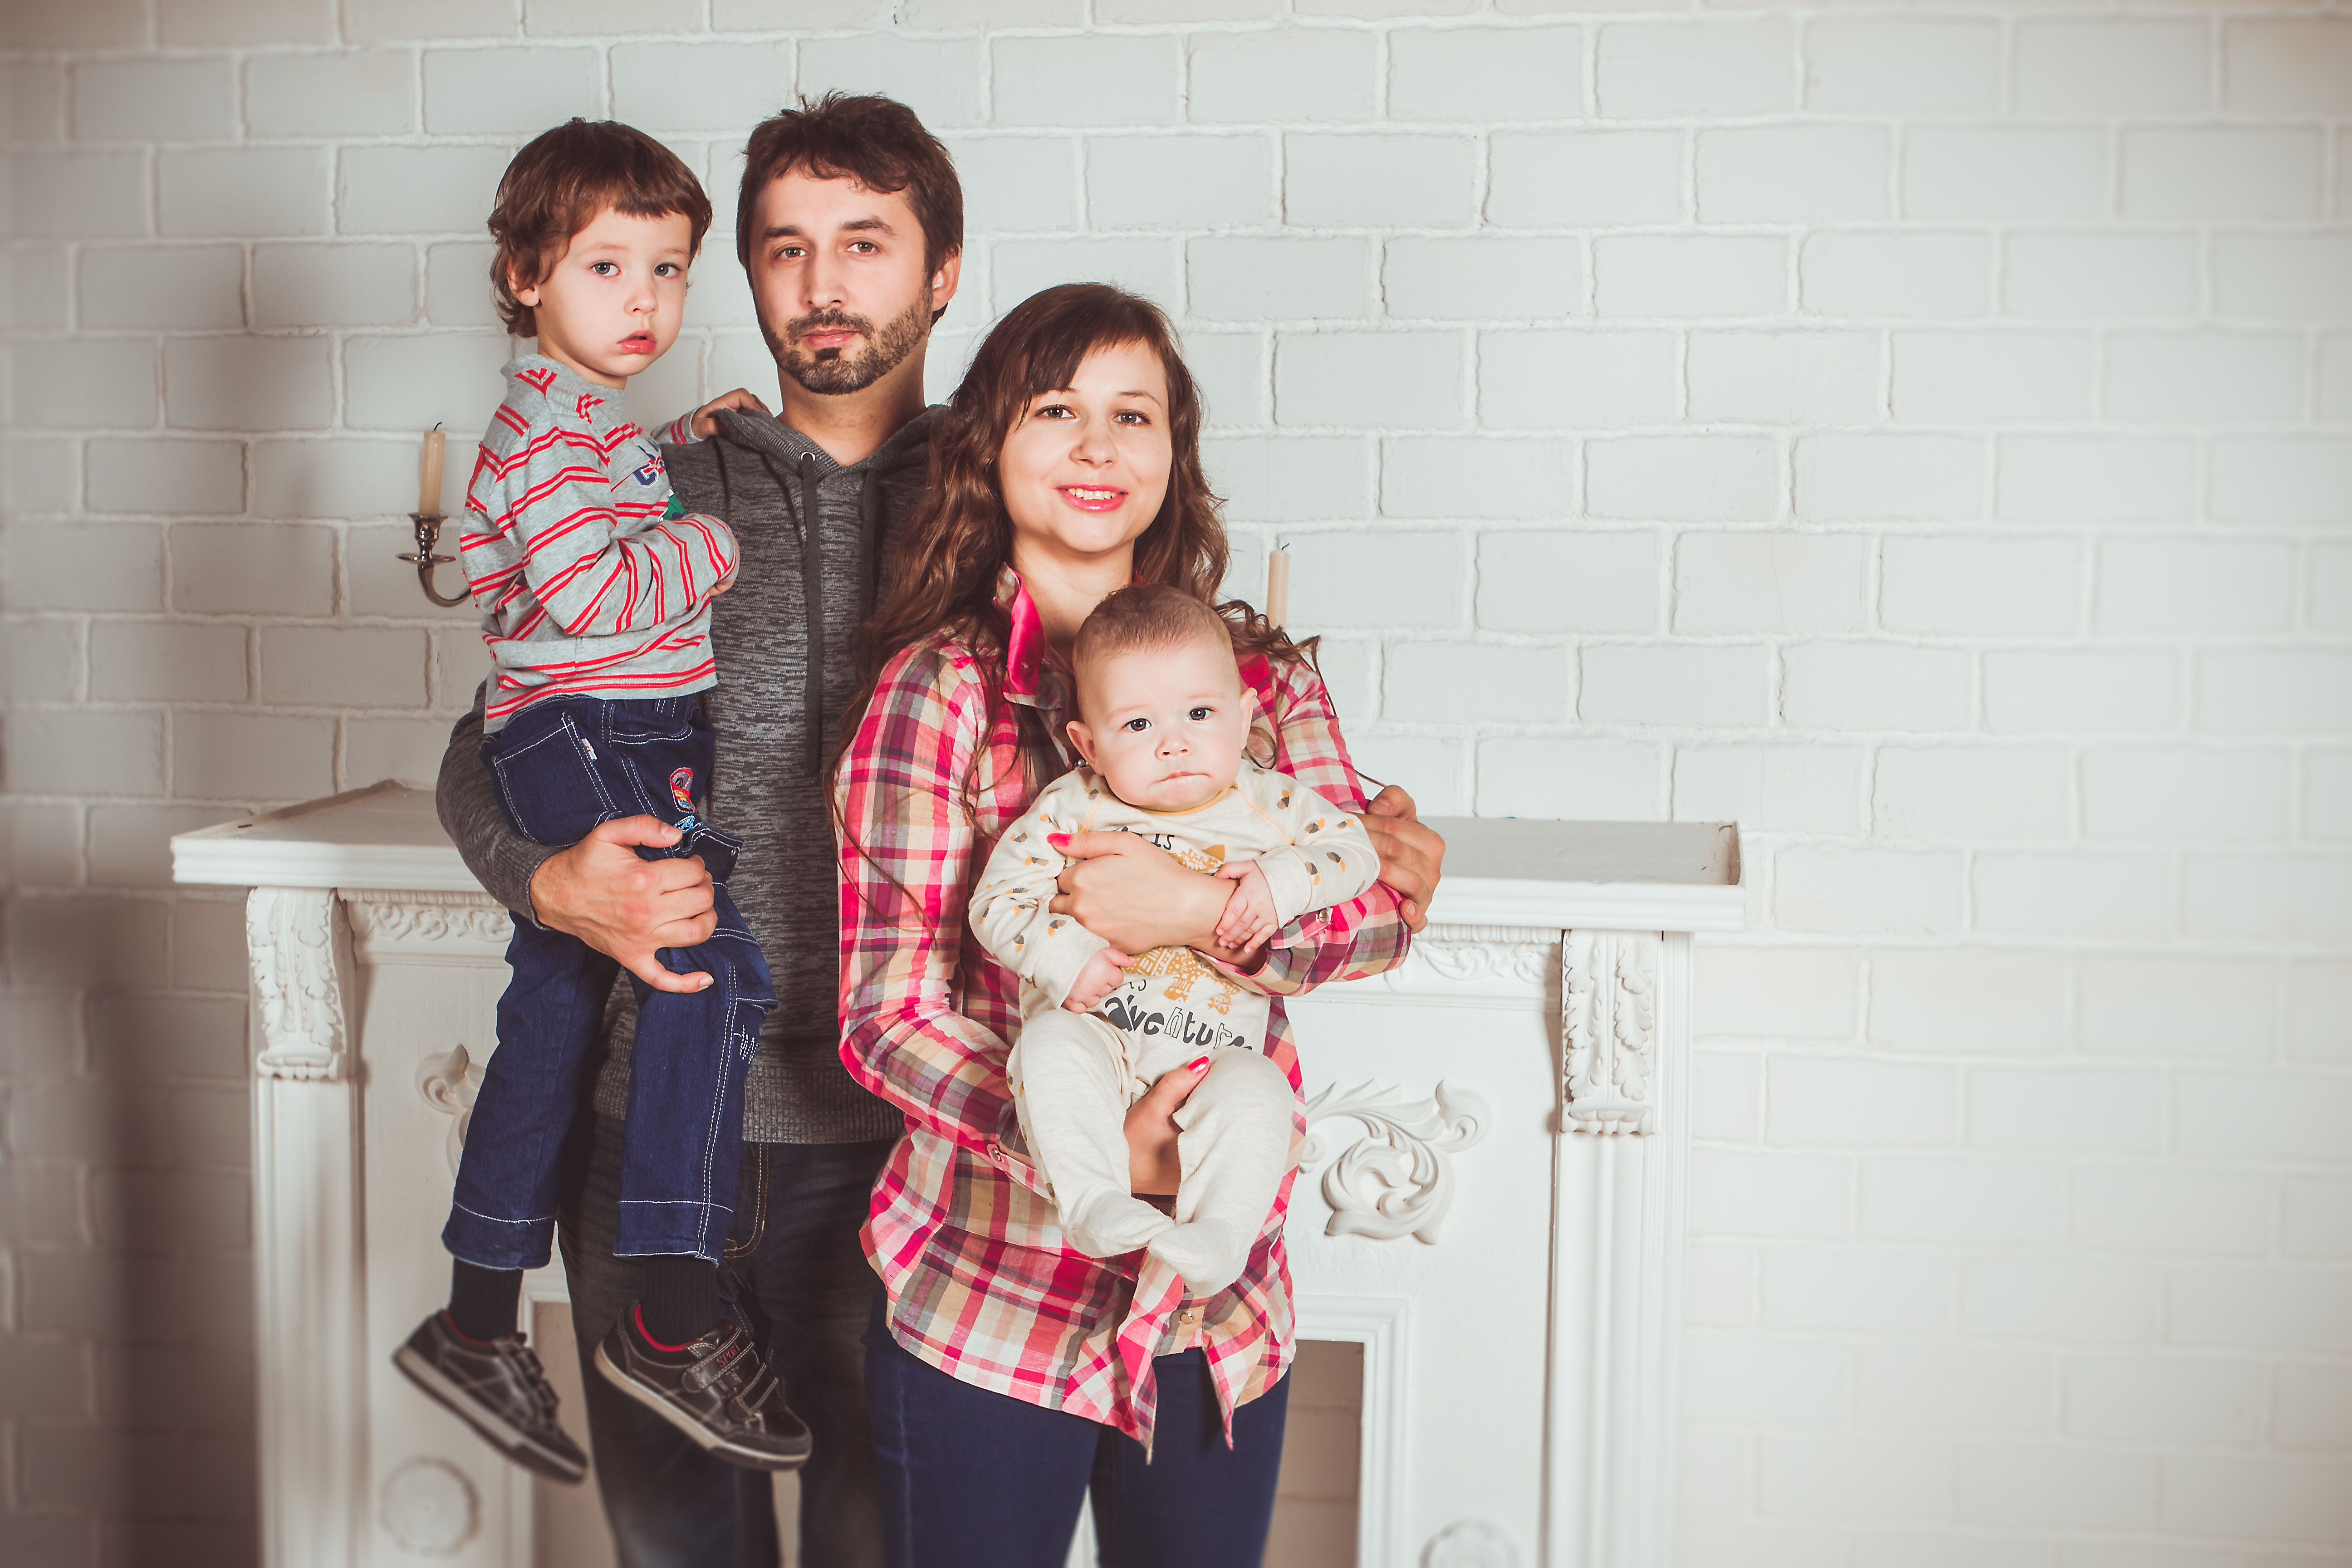

In [3]:
# display the image
IMGDIR = './images'
img_1_path = os.path.join(IMGDIR, 'img_1.jpg')
Image(img_1_path)

In the above image we needed to run our weak classifiers to give a strong prediction of the human faces.

In [4]:
# read the image
original_img = cv.imread(img_1_path)
original_img.shape

(3456, 5184, 3)

This shape method return us a tuple with image width, height and channels. If number of channels are 3 that means we are having a colored image(RGB).

In [5]:
# convert the image to grayscale
grayscale_img = cv.cvtColor(original_img, cv.COLOR_BGR2GRAY)
grayscale_img.shape

(3456, 5184)

Now, our image is successfully converted to grayscale.

#### 3. Apply Classifier

We are going to use <b>Viola-Jones pre-trained classifier</b> which can be found inside ```haarcascade_frontalface_alt.xml``` file to classify human faces.

In [6]:
# load the classifier and create a cascade object for face detection
CLASSIFIER_DIR = './classifiers'
face_classifier_path = os.path.join(CLASSIFIER_DIR, 'haarcascade_frontalface_alt.xml')

face_cascade = cv.CascadeClassifier(face_classifier_path)
face_cascade

<CascadeClassifier 0000025DF88B9030>

The classifier is successfully loaded and in the next step we will use ```detectMultiScale()``` method, which receives a grayscale image as an argument and runs the classifier cascade over the image.

In [7]:
# parameters
SCALE_FACTOR = 1.2 # tuneable
MIN_NEIGHBORS = 5
MIN_SIZE = (30, 30)

- <b>scaleFactor: </b>Since some faces may be closer to the camera, they would appear bigger than those faces in the back. The ```scaleFactor``` compensates for this.
- <b>minNeighbors: </b>It defines how many objects are detected near the current one before it declares the face found.
- <b>minSize: </b>It gives the size of each window.

In [8]:
# function to detect human faces
def detected_faces(img, scaleFactor, minNeighbors):
    detect_faces = face_cascade.detectMultiScale(img, scaleFactor, minNeighbors, minSize = MIN_SIZE)
    return detect_faces

In [9]:
faces = detected_faces(img = grayscale_img, 
               scaleFactor = SCALE_FACTOR,
               minNeighbors = MIN_NEIGHBORS)
faces

array([[1585,  362,  479,  479],
       [1211,  438,  395,  395],
       [2397, 1438,  365,  365],
       [2186,  747,  459,  459]], dtype=int32)

Now, the variable ```detect_faces``` contains all the detections for the target image in the form of an array. The returned array contains four values: the ```x``` and ```y``` location of the rectangle, and the rectangle's ```width``` and ```height```.

In [10]:
# count the faces detected by the classifier in the image
print("Classifier found {} faces.".format(len(faces)))

Classifier found 4 faces.


#### 4. Save Classified Image

In [11]:
for (x, y, w, h) in faces:
    cv.rectangle(img = original_img, 
                 pt1 = (x, y),
                 pt2 = (x + w, y + h),
                 color = (0, 255, 0),
                 thickness = 10)

In [12]:
# function to save file
def save_file(file_path, img):
    cv.imwrite(file_path, img)

In [13]:
# save file
save_file(file_path = './classified_images/classified_img_1.jpg', img = original_img)